Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [14]:
df=pd.read_csv('marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

print("The oldest record on customer's enrollment:", min(df['Dt_Customer']).date())
print("The newest record on customer's enrollment:", max(df['Dt_Customer']).date())

The oldest record on customer's enrollment: 2012-01-08
The newest record on customer's enrollment: 2014-12-06


So, we are going to modify some features as well as create new ones for further analysis and modeling

Age: The age of the customers are the age in 2014 as it's the last record we have (6th Dec 2014) or we can round that up to 2015

Education: Narrowing down to 3 categories

Living_With: Narrowing down to 2 categories

Total_Children: Merging Kidhome and Teenhome columns into 1 column which describes the number of children living in the household

Dt_Customer: Extracting new features out of dates to make Day, Dayofweek, Month, and Year features

Is_Parent: Referring to the parenthood status

Total_Spent: Customer's total spent on products

Renaming several features for simplicity

In [17]:
df['Age'] = 2015 - df['Year_Birth'] 
df['Education'] = df['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', '2n Cycle': 'Postgraduate', 'Basic': 'Undergraduate'})
df['Living_With'] = df['Marital_Status'].replace({'Married': 'Partner', 'Together': 'Partner', 'Single': 'Alone', 'Divorced': 'Alone', 'Widow': 'Alone', 'Absurd': 'Alone', 'YOLO': 'Alone'})
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Breaking down the date of customer's enrollment
df['Day'] = df['Dt_Customer'].apply(lambda x: x.day)
df['Dayofweek'] = df['Dt_Customer'].apply(lambda x: x.day_name())
df['Month'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Year'] = df['Dt_Customer'].apply(lambda x: x.year)

df['Is_Parent'] = df['Total_Children'].apply(lambda x: 1 if x != 0 else 0)
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Clear description of feature
df.rename(columns={'MntWines':'Wines', 'MntFruits':'Fruits', 'MntMeatProducts':'Meats', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweets', 'MntGoldProds':'Golds'}, inplace=True)
df.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store'}, inplace=True)

# Drop unnecessary columns and nan values
df.dropna(inplace=True)
df.drop(['ID', 'Dt_Customer', 'Year_Birth', 'Marital_Status', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

df1 = df.copy()

In [18]:
df1.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meats,Fish,Sweets,...,Response,Age,Living_With,Total_Children,Day,Dayofweek,Month,Year,Is_Parent,Total_Spent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,1,58,Alone,0,9,Monday,4,2012,0,1617
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,61,Alone,2,3,Sunday,8,2014,1,27
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,50,Partner,0,21,Wednesday,8,2013,0,776
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,31,Partner,1,2,Thursday,10,2014,1,53
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,34,Partner,1,19,Sunday,1,2014,1,422


In [19]:
print('Income:')
print(df1['Income'].sort_values().tail(5))

print('\nAge:')
print(df1['Age'].sort_values().tail(5))


Income:
164     157243.0
1300    157733.0
687     160803.0
617     162397.0
2233    666666.0
Name: Income, dtype: float64

Age:
424      74
1950     75
192     115
339     116
239     122
Name: Age, dtype: int64


In [20]:
# Get rid of outliers
df1 = df1.drop(2233)
df1 = df1[df1['Age'] < 80]

## Data Visualization

In [21]:
sns.color_palette('copper_r')

[(1.0, 0.6709129411764706, 0.42726470588235294),
 (0.8816606922044046, 0.5575623529411765, 0.355078431372549),
 (0.7072662695705663, 0.4472752941176471, 0.28484313725490196),
 (0.5280275574191214, 0.33392470588235296, 0.21265686274509804),
 (0.35363313478528313, 0.2236376470588235, 0.14242156862745098),
 (0.1743944226338383, 0.1102870588235294, 0.07023529411764706)]

Text(0.5, 1.05, 'Feature Relationship')

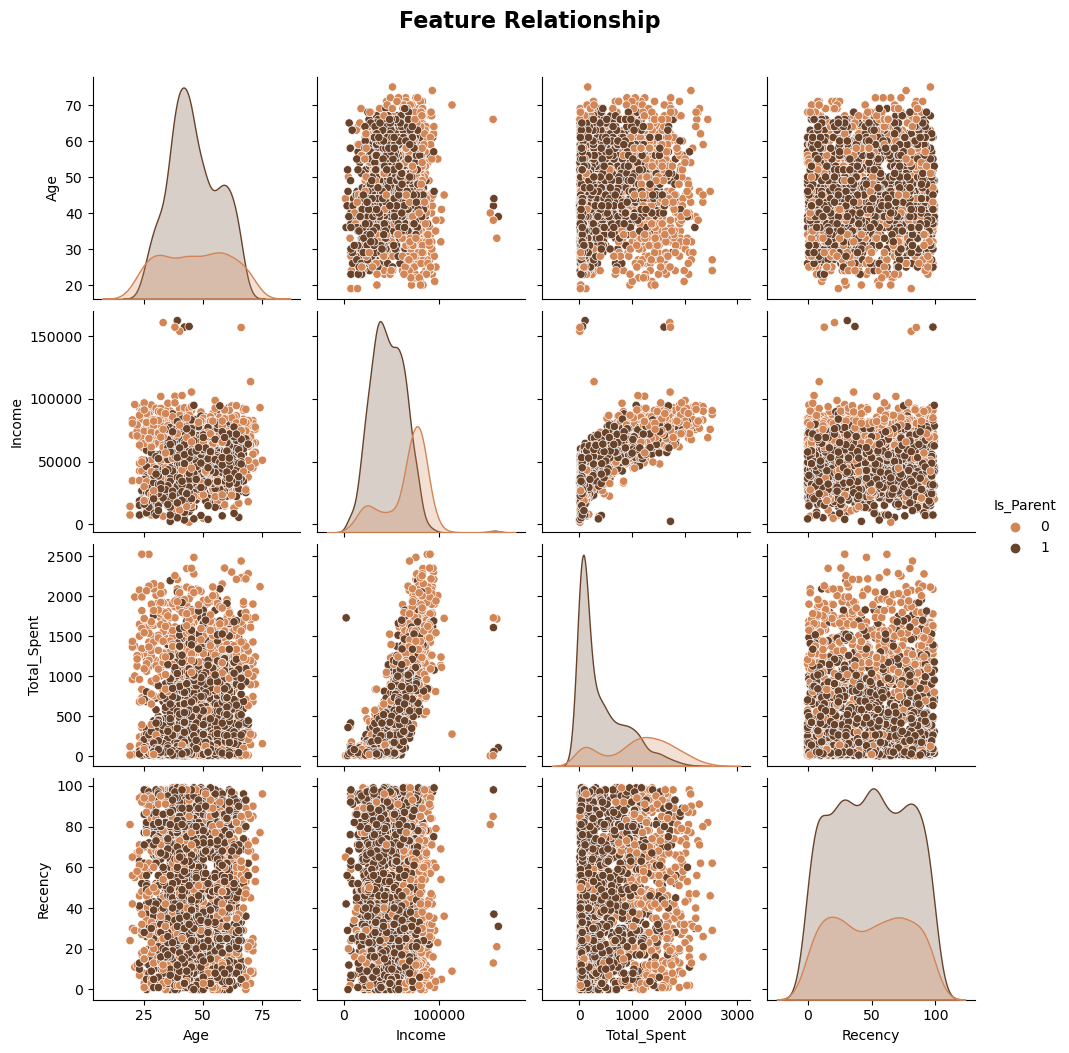

In [22]:
data = ['Age', 'Income', 'Total_Spent', 'Recency', 'Is_Parent']

plot = sns.pairplot(df1[data], hue='Is_Parent', palette='copper_r')
plot.fig.suptitle('Feature Relationship', y=1.05, weight='bold', fontsize=16)

**Insights from graphs**

At a glance, we can see that parents expended less money on products than people who were not a parent yet
People who had higher income were more likely to expend more on products

<AxesSubplot:xlabel='Year', ylabel='count'>

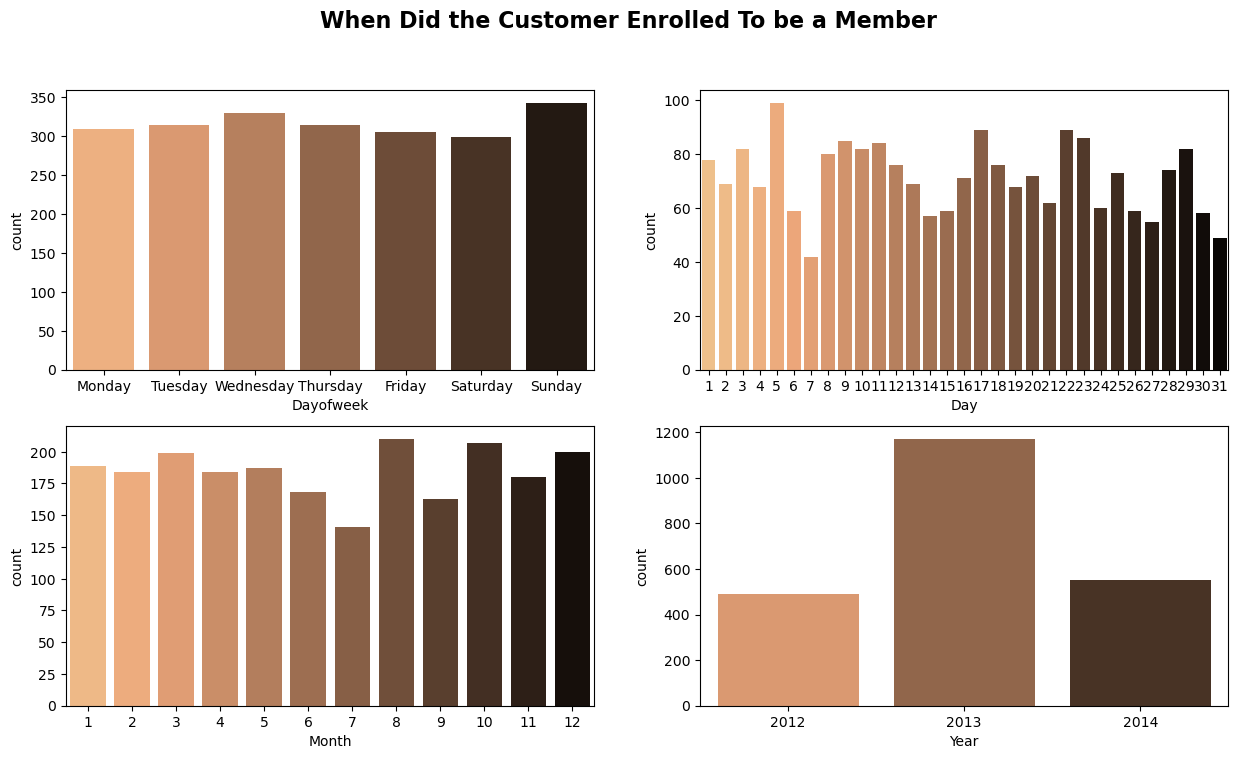

In [23]:
fig, axes = plt.subplots(2,2, figsize=(15,8))
axes = axes.flatten()
fig.suptitle("When Did the Customer Enrolled To be a Member", weight='bold', fontsize=16)

sns.countplot(df1['Dayofweek'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'], palette='copper_r', ax=axes[0])

# mean_day = df['Day'].value_counts().mean()
sns.countplot(df1['Day'], palette='copper_r', ax=axes[1])
# axes[1].axhline(mean_day, ls='--', color='r')
# axes[1].text(31, mean_day, 'Mean: {} new members'.format(round(mean_day)), color='red')

sns.countplot(df1['Month'], palette='copper_r', ax=axes[2])

sns.countplot(df1['Year'], palette='copper_r', ax=axes[3])

**Insights from graphs**

Majority of customers registered to be a company's member on sunday. It's probably because they had more time on the weekend
On the other side, most of the customers enrolled on 5th day of each month

August and october were similar in the number of enrollment with more than 200 people for each month. 

Also, 2013 yielded the most members simply because it had more data than the rest of the years in this dataset

In [24]:
group = pd.cut(df['Age'], [10, 20, 30, 40, 50, 60, 70, 80])
group.value_counts()

(40, 50]    669
(30, 40]    553
(50, 60]    459
(60, 70]    298
(20, 30]    212
(70, 80]     15
(10, 20]      7
Name: Age, dtype: int64

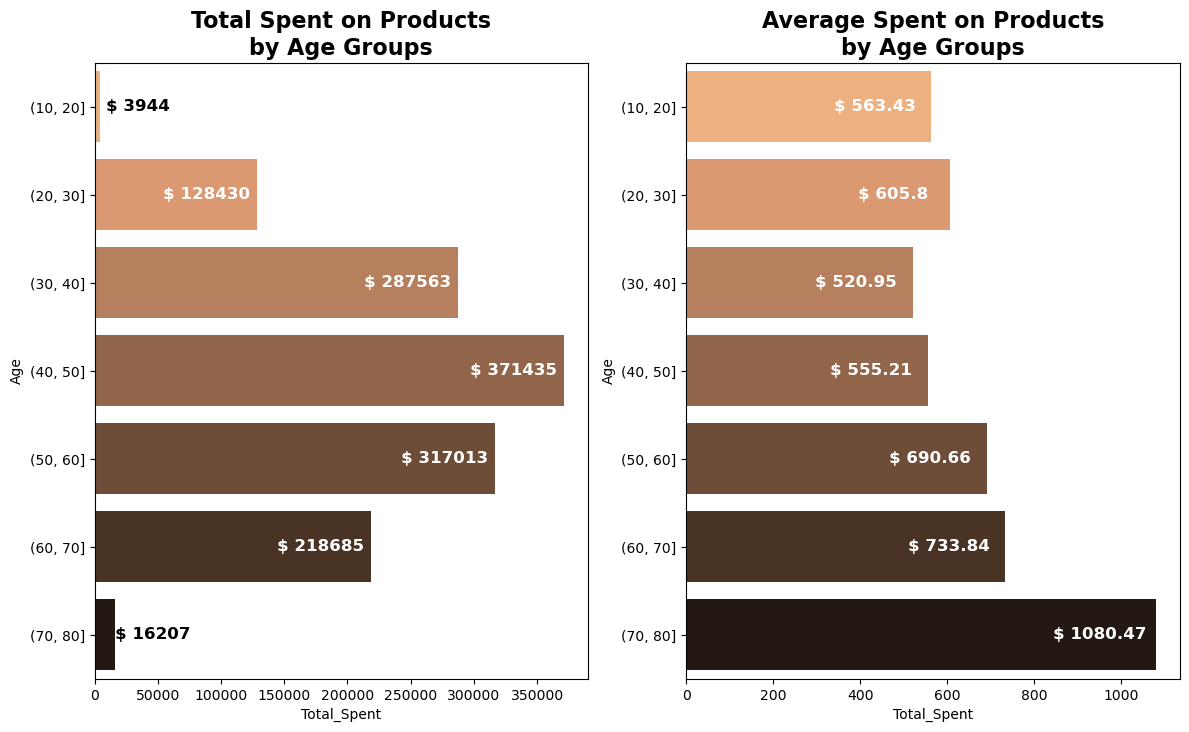

In [25]:
df2 = df1.copy()
df2['Age'] = group

sum_group = df2[['Total_Spent', 'Age']].groupby('Age').sum()
mean_group = df2[['Total_Spent', 'Age']].groupby('Age').mean()

fig, axes = plt.subplots(1,2,figsize=(14,8))
axes = axes.flatten()

sns.barplot(x=sum_group['Total_Spent'], y=sum_group.index, palette='copper_r', ci=None, orient='h', ax=axes[0])
axes[0].set_title('Total Spent on Products\nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(sum_group['Total_Spent']):
    if i == 0 or i ==6:
        axes[0].text(v+30000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='black', fontsize=12)
    else:
        axes[0].text(v-40000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='white', fontsize=12)

sns.barplot(x=mean_group['Total_Spent'], y=mean_group.index, palette='copper_r', ci=None, orient='h', ax=axes[1])
axes[1].set_title('Average Spent on Products\nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(mean_group['Total_Spent']):
    axes[1].text(v-130, i, '$ {}'.format(round(v,2)), horizontalalignment='center', verticalalignment='center', weight='bold', color='white', fontsize=12)
    
    

**Insights from graphs**

The distribution of the data was not equal for each group. There was only 21 people in total of the first group and the last group. 
That's why there was a huge contrast on total spent

Since the number of people in each group was not balanced, we can use average spent. People over 70 years old spent more money on products compared to the rest of the age group with more than 1000 dollars, It's 2 times higher than 30-40 years people did in the same period of time

(0.0, 1.0, 0.0, 1.0)

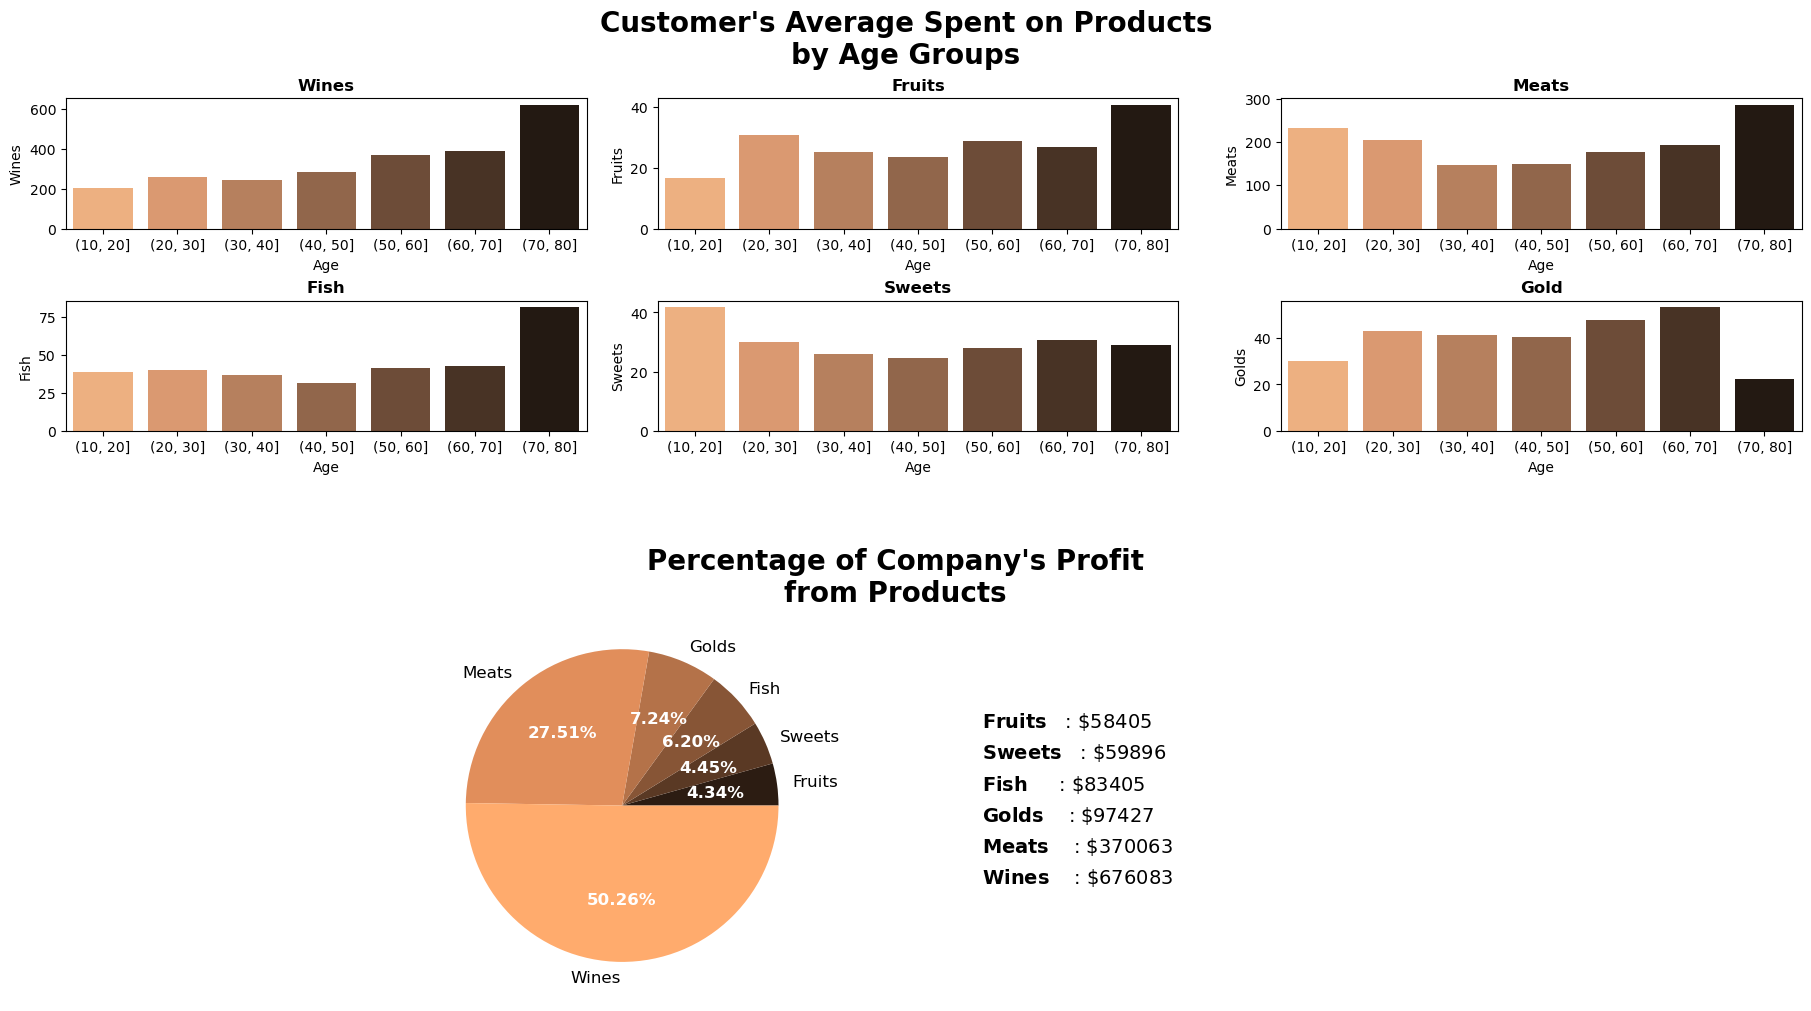

In [26]:
fig, axd = plt.subplot_mosaic([[0,1,2],[3,4,5], [6,6,7], [6,6,7], [6,6,7]],
                              constrained_layout=True, figsize=(18,10))

fig.suptitle("Customer's Average Spent on Products\nby Age Groups", weight='bold', fontsize=20)

# Bar plot
sns.barplot(data=df, x=group, y='Wines', palette='copper_r', ci=None, ax=axd[0])
axd[0].set_title('Wines', weight='bold')
sns.barplot(data=df, x=group, y='Fruits', palette='copper_r', ci=None, ax=axd[1])
axd[1].set_title('Fruits', weight='bold')
sns.barplot(data=df, x=group, y='Meats', palette='copper_r', ci=None, ax=axd[2])
axd[2].set_title('Meats', weight='bold')
sns.barplot(data=df, x=group, y='Fish', palette='copper_r', ci=None, ax=axd[3])
axd[3].set_title('Fish', weight='bold')
sns.barplot(data=df, x=group, y='Sweets', palette='copper_r', ci=None, ax=axd[4])
axd[4].set_title('Sweets', weight='bold')
sns.barplot(data=df, x=group, y='Golds', palette='copper_r', ci=None, ax=axd[5])
axd[5].set_title('Gold', weight='bold')

# Pie chart
data = df[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']].sum().sort_values()

palette = sns.color_palette('copper')
wedges, texts, autotexts = axd[6].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axd[6].set_title("\n\nPercentage of Company's Profit\nfrom Products", weight='bold', fontsize=20, x=1.2)
    
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    
# Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axd[6].text(2.3, 0.5-0.2*i, r"$\bf{" + name + "}$" + "\t:" + " \$" + str(value), fontsize=14)
    
axd[7].axis('off')

**Insights from graphs**

All the products were dominated by people over 70 years old except for the sweets and golds.

The oldest group's average spent on wines was incredibly high above 600 dollars.

Wines were the company's best selling product followed by meats, and golds. For wine products only, it yielded more than 675k dollars in a span of 3 years. It's 50.27% of company's income

(0.0, 1.0, 0.0, 1.0)

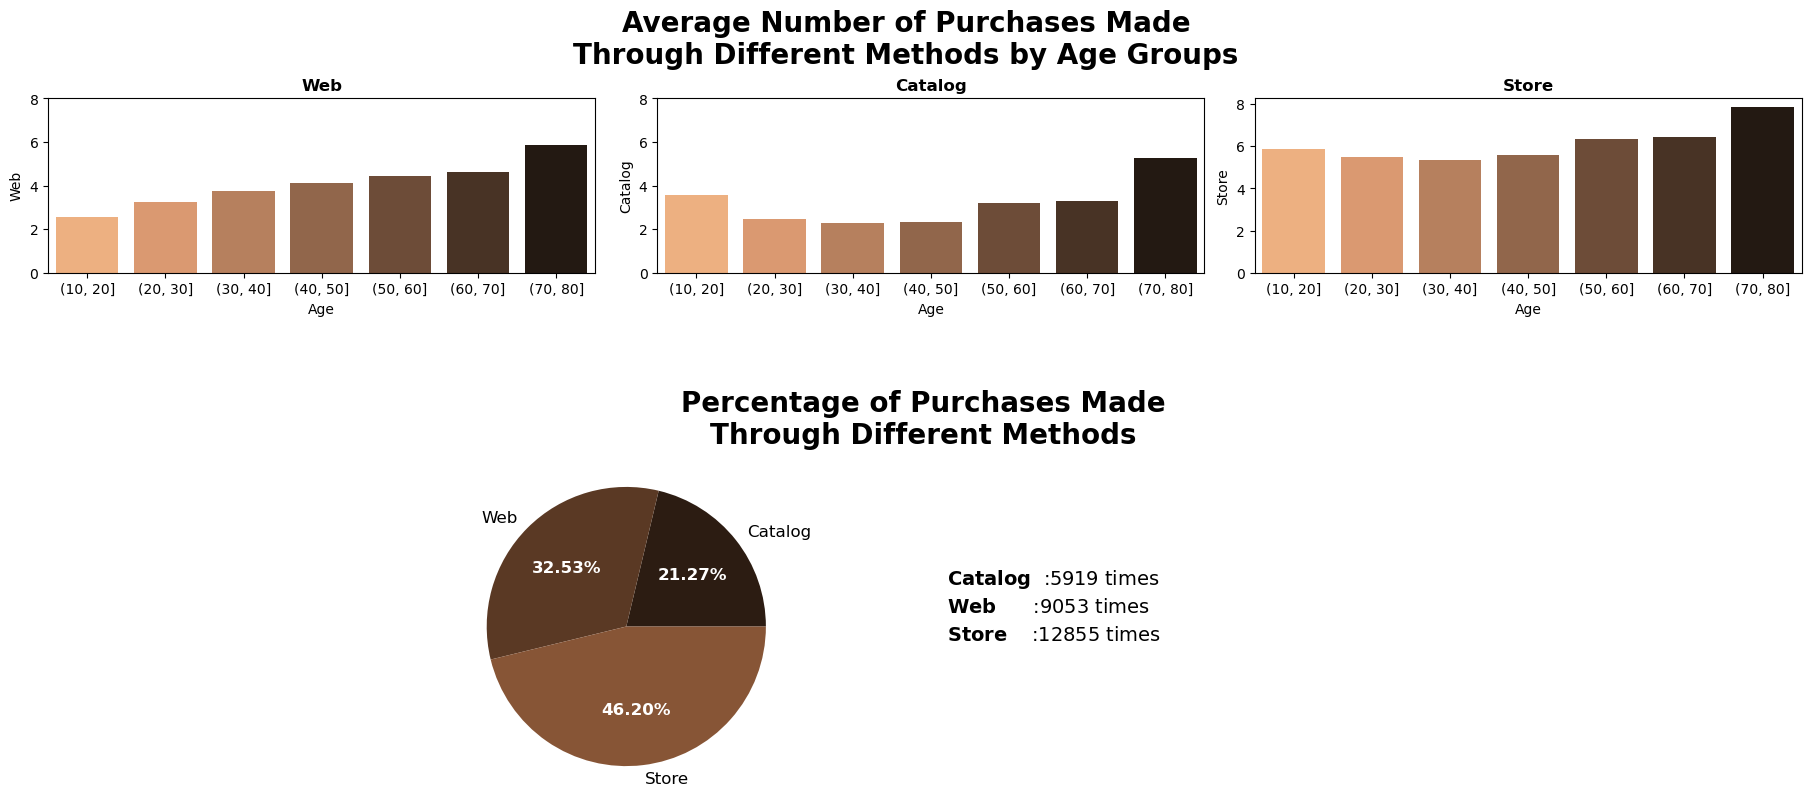

In [28]:
fig, axd = plt.subplot_mosaic([[0,1,2], [3,3,4], [3,3,4]],
                               constrained_layout=True, figsize=(18,8))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Age Groups", weight='bold', fontsize=20)

custom_ylim = (0, 8)
plt.setp(axd[0], ylim=custom_ylim)
plt.setp(axd[1], ylim=custom_ylim)

# Bar plot
sns.barplot(data=df, x=group, y='Web', palette='copper_r', ci=None, ax=axd[0])
axd[0].set_title('Web', weight='bold')
sns.barplot(data=df, x=group, y='Catalog', palette='copper_r', ci=None, ax=axd[1])
axd[1].set_title('Catalog', weight='bold')
sns.barplot(data=df, x=group, y='Store', palette='copper_r', ci=None, ax=axd[2])
axd[2].set_title('Store', weight='bold')

# Pie chart
data = df[['Web', 'Catalog', 'Store']].sum().sort_values()

palette = sns.color_palette('copper')
wedges, texts, autotexts = axd[3].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axd[3].set_title('\n\nPercentage of Purchases Made\nThrough Different Methods', weight='bold', fontsize=20, x=1.35)
    
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    
# Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axd[3].text(2.3, 0.3-0.2*i, r"$\bf{" + name + "}$" + "\t:" + str(value) + " times", fontsize=14)

axd[4].axis('off')

**Insights from graphs**

Purchases made through web, catalog, and store were also dominated by people over 70 years old even though the number of people in that age group were only 15 (look at the number of people of each group). 
It's because the number of purchases they made were higher than the rest of age groups.

A large number of successful purchases occurred directly in the store. It accounted for 46.2% of total purchases made to the company

<AxesSubplot:title={'center':'Average Number of Purchases Made with a Discount\nby Age Groups'}, xlabel='Age', ylabel='NumDealsPurchases'>

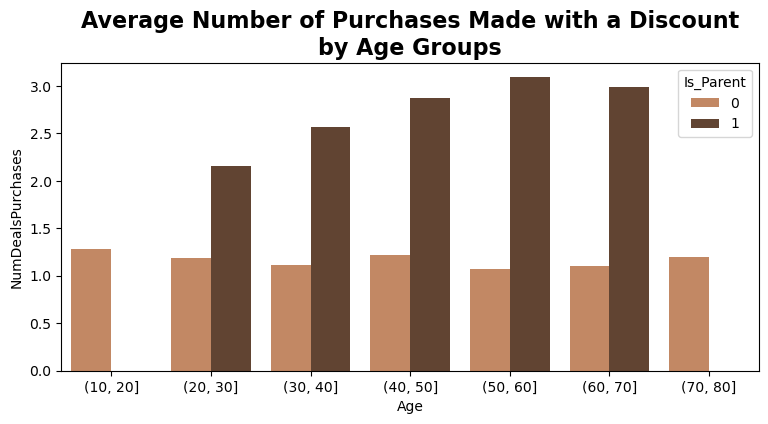

In [29]:
plt.figure(figsize=(9,4))
plt.title('Average Number of Purchases Made with a Discount\nby Age Groups', weight='bold', fontsize=16)
sns.barplot(data=df, x=group, y='NumDealsPurchases', hue='Is_Parent', ci=None, palette='copper_r')

**Insights from graphs**

Parents were the ones who were attracted more easily by discounts. It's clearly shown on the graph above where in this case the number of purchases made with a discount by parents surpassed non-parents

## Data Preprocessing

In [31]:
obj_feat = df.select_dtypes(exclude=[np.number]).columns

dummies = pd.get_dummies(df[obj_feat], drop_first=True)
df_final = pd.concat([df, dummies], axis=1)
df_final.drop(obj_feat, axis=1, inplace=True)
df_final.shape

(2216, 38)

In [34]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 1.1 MB/s eta 0:00:00


In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

In [36]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_final)

df_final_scaled = pd.DataFrame(scaled, columns=df_final.columns)
df_final_scaled.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meats,Fish,Sweets,Golds,...,Total_Spent,Education_Postgraduate,Education_Undergraduate,Living_With_Partner,Dayofweek_Monday,Dayofweek_Saturday,Dayofweek_Sunday,Dayofweek_Thursday,Dayofweek_Tuesday,Dayofweek_Wednesday
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,...,1.675488,-0.945525,-0.158041,-1.348829,2.484255,-0.395697,-0.427197,-0.407818,-0.406312,-0.418298
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,...,-0.962358,-0.945525,-0.158041,-1.348829,-0.402535,-0.395697,2.340840,-0.407818,-0.406312,-0.418298
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,...,0.280250,-0.945525,-0.158041,0.741384,-0.402535,-0.395697,-0.427197,-0.407818,-0.406312,2.390638
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,...,-0.919224,-0.945525,-0.158041,0.741384,-0.402535,-0.395697,-0.427197,2.452072,-0.406312,-0.418298
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,...,-0.307044,1.057614,-0.158041,0.741384,-0.402535,-0.395697,2.340840,-0.407818,-0.406312,-0.418298


In [37]:
# Transform df for the next step which visualizes the data
le = LabelEncoder()

for obj in obj_feat[:-1]:
    trans = le.fit_transform(df[obj])
    df[obj] = trans

**CLUSTERING**

Elbow is one of the well-known techniques to determine optimal number of clusters in the data. We will leave the metric distortion as a default which computes the SSE or sum of squared error (distances) from each point to its assigned center using euclidean distance. Altough SSE will decrease as the rise of k, ideally we want a small number of k that still has a small SSE. Therefore, it's just kind of a tradeoff

The k value may vary due to the random initialization of cluster centroids in KMeans Clustering. To make it consistent throughout this notebook, we set a random state to be 123

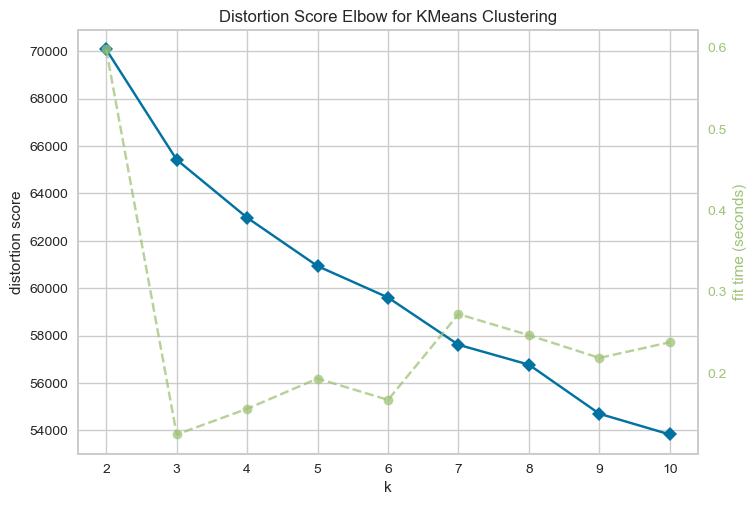

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
elbow = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow.fit(df_final_scaled)
elbow.show()

In [39]:
# Set number of cluster to 5
model = KMeans(n_clusters=5, random_state=123)
yhat = model.fit_predict(df_final_scaled)

df['Cluster'] = yhat

<AxesSubplot:xlabel='Cluster', ylabel='count'>

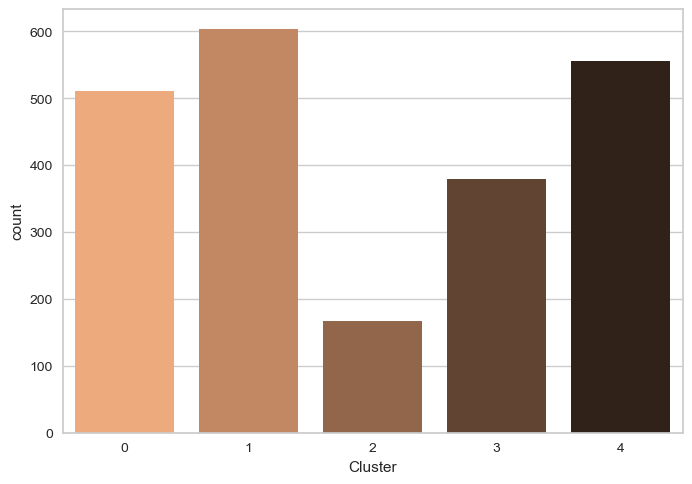

In [40]:
sns.countplot(data=df, x='Cluster', palette='copper_r')

## CUSTOMER PROFILING

<AxesSubplot:label='2', xlabel='Cluster', ylabel='Income'>

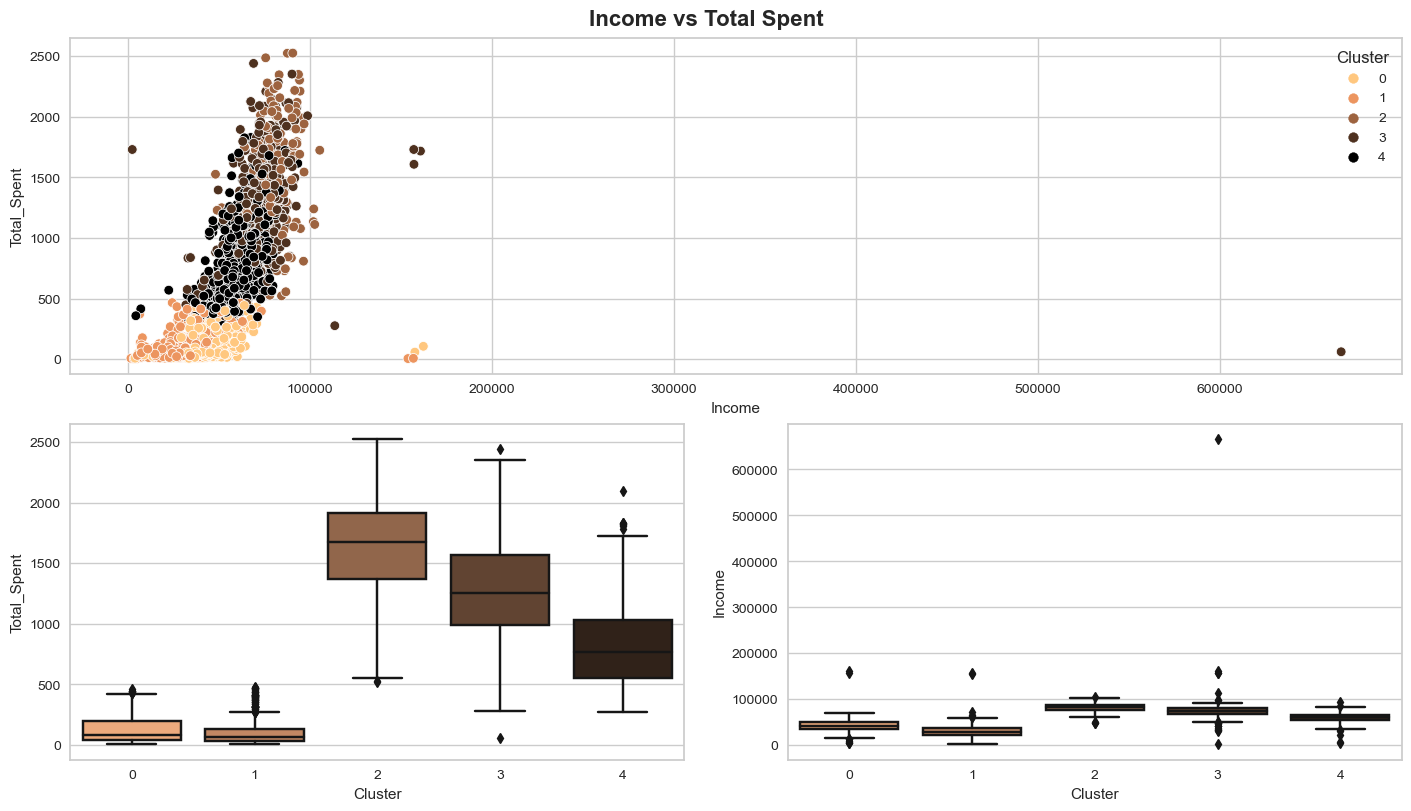

In [42]:
fig, axd = plt.subplot_mosaic([[0,0],[1,2]], constrained_layout=True, figsize=(14,8))
fig.suptitle('Income vs Total Spent', weight='bold', fontsize=16)

sns.scatterplot(data=df, x='Income', y='Total_Spent', hue='Cluster', palette='copper_r', ax=axd[0])
sns.boxplot(data=df, x='Cluster', y='Total_Spent', palette='copper_r', ax=axd[1])
sns.boxplot(data=df, x='Cluster', y='Income', palette='copper_r', ax=axd[2])

**From those graphs, we can deduce that:**
    
Cluster 0: Low spending & low income 
    
Cluster 1: Lowest spending & Lowest income
    
Cluster 2: Highest spending & Highest income  
    
Cluster 3: Average spending & Average income 
    
Cluster 4: High spending & High income

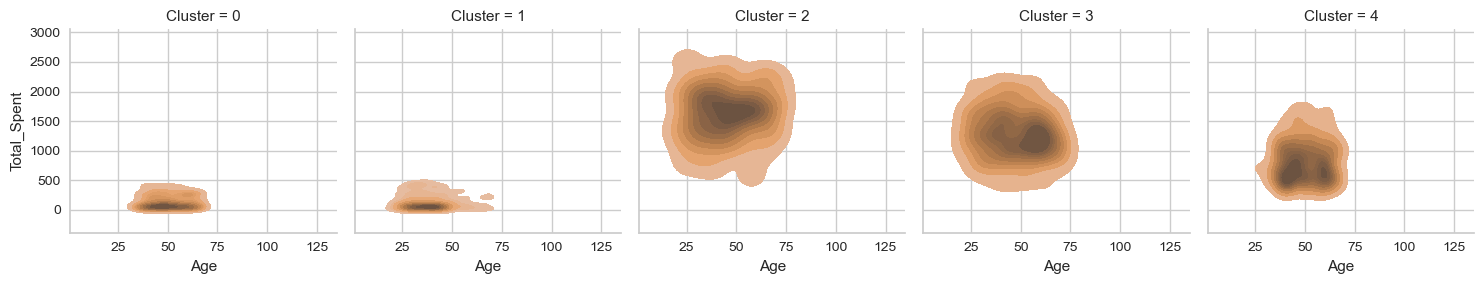

In [50]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Age', 'Total_Spent', color='#c08552', fill=True)

Text(0.6, 3900, '0: Non Parent\n1: Parent')

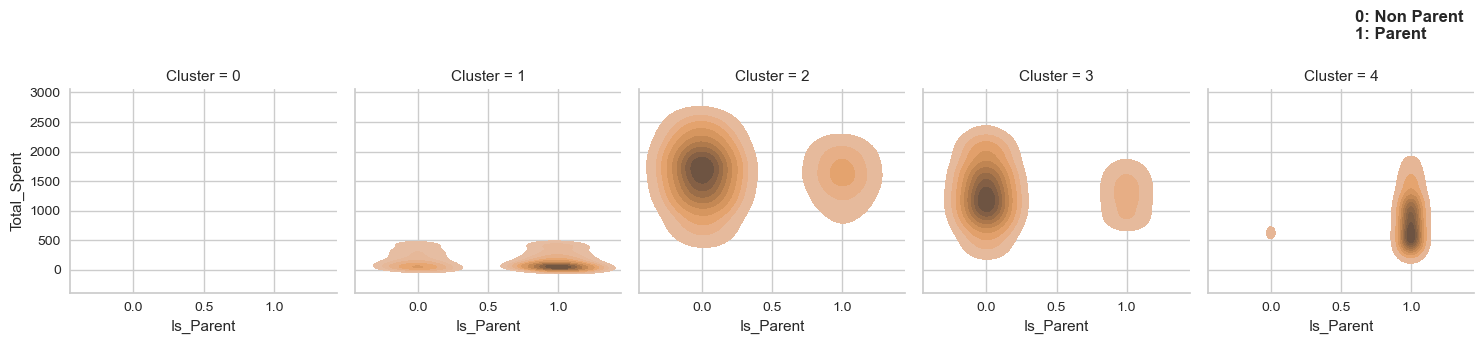

In [51]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Is_Parent', 'Total_Spent', color='#c08552', fill=True)

plt.text(0.6,3900, '0: Non Parent\n1: Parent', weight='bold', fontsize=12)

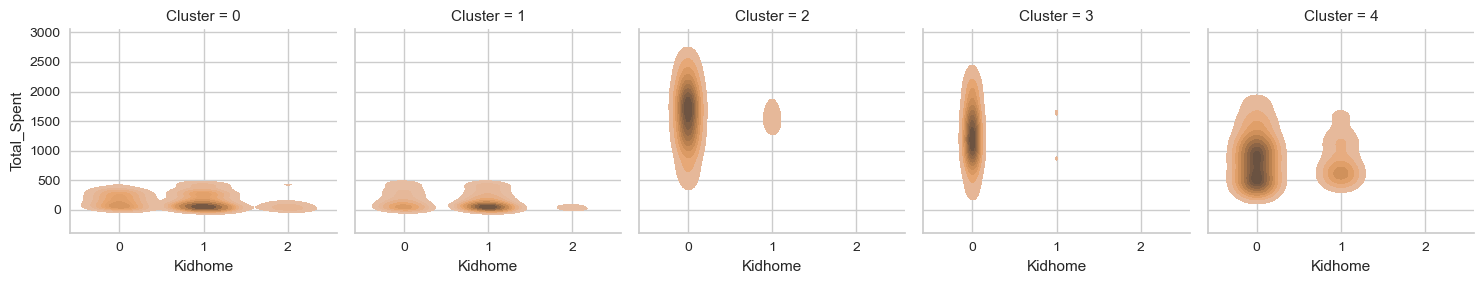

In [52]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Kidhome', 'Total_Spent', color='#c08552', fill=True)

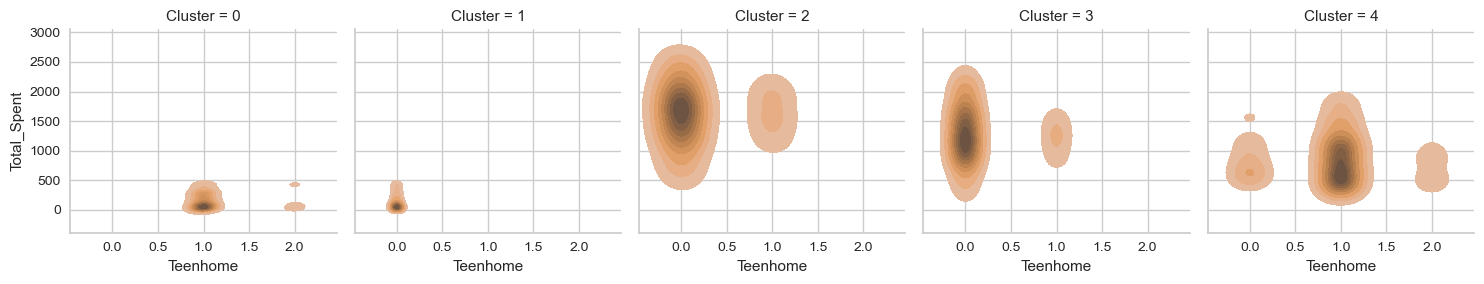

In [53]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Teenhome', 'Total_Spent', color='#c08552', fill=True)

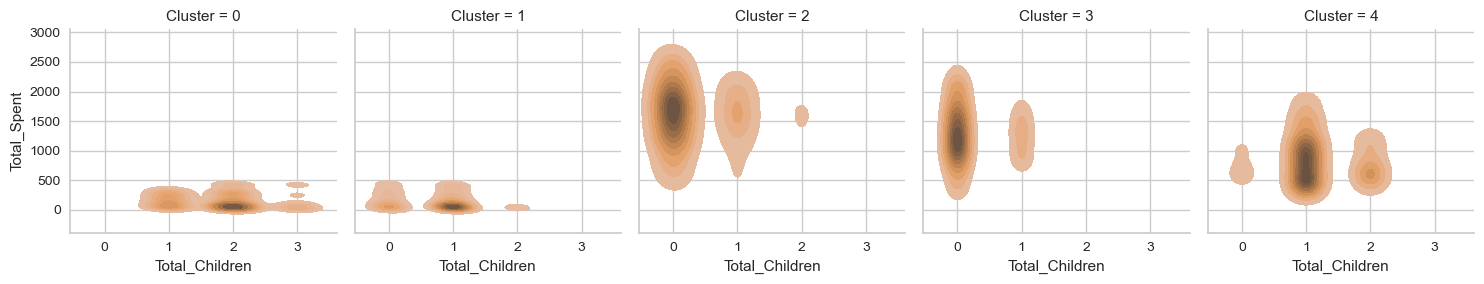

In [54]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Total_Children', 'Total_Spent', color='#c08552', fill=True)

Text(0.7, 3900, '0: Alone\n1: Partner')

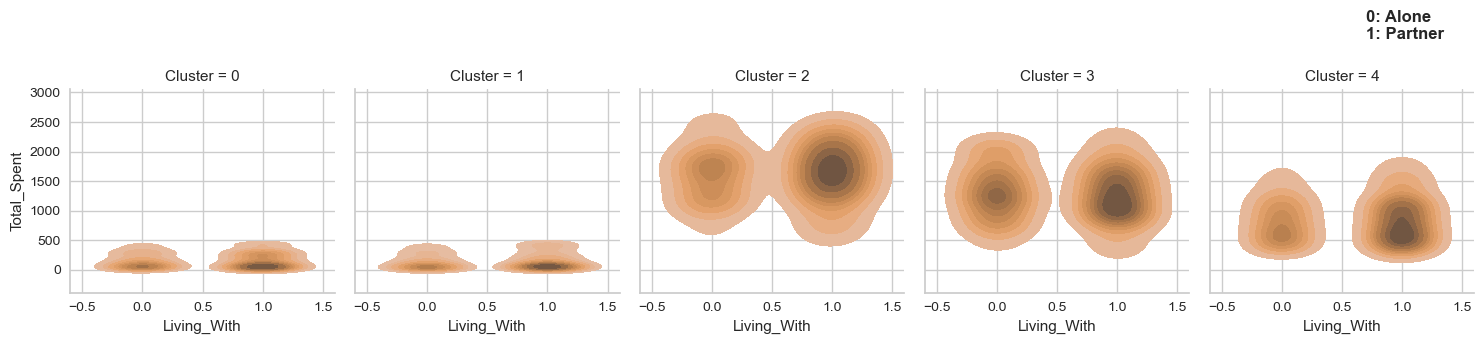

In [55]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.kdeplot, 'Living_With', 'Total_Spent', color='#c08552', fill=True)

plt.text(0.7,3900, '0: Alone\n1: Partner', weight='bold', fontsize=12)

Text(0.6, 3400, '0: Graduate\n1: Postgraduate\n2: Undergraduate')

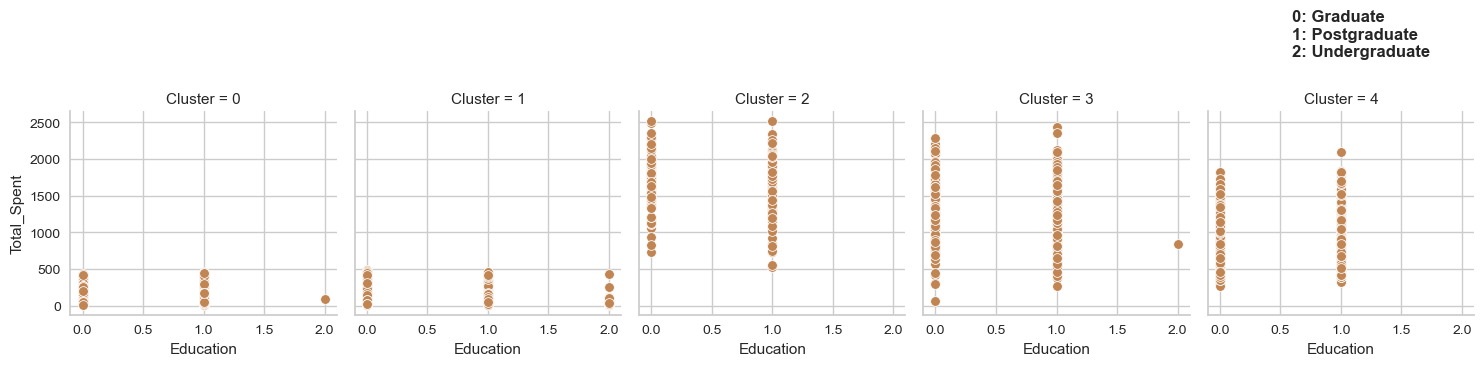

In [56]:
g = sns.FacetGrid(data=df, col='Cluster')
g.map(sns.scatterplot, 'Education', 'Total_Spent', color='#c08552')

plt.text(0.6,3400, '0: Graduate\n1: Postgraduate\n2: Undergraduate', weight='bold', fontsize=12)

<AxesSubplot:title={'center':"Average Number of Days Since Customer's Last Purchase\nby Clusters"}, xlabel='Cluster', ylabel='Recency'>

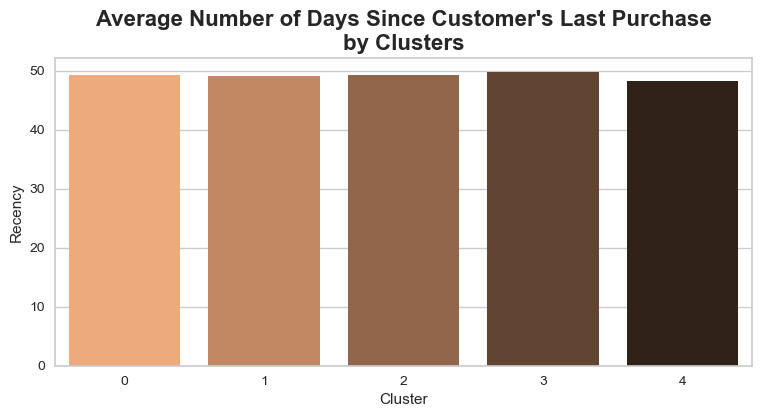

In [43]:
plt.figure(figsize=(9,4))
plt.title("Average Number of Days Since Customer's Last Purchase\nby Clusters", weight='bold', fontsize=16)
sns.barplot(data=df, x='Cluster', y='Recency', palette='copper_r', ci=None)

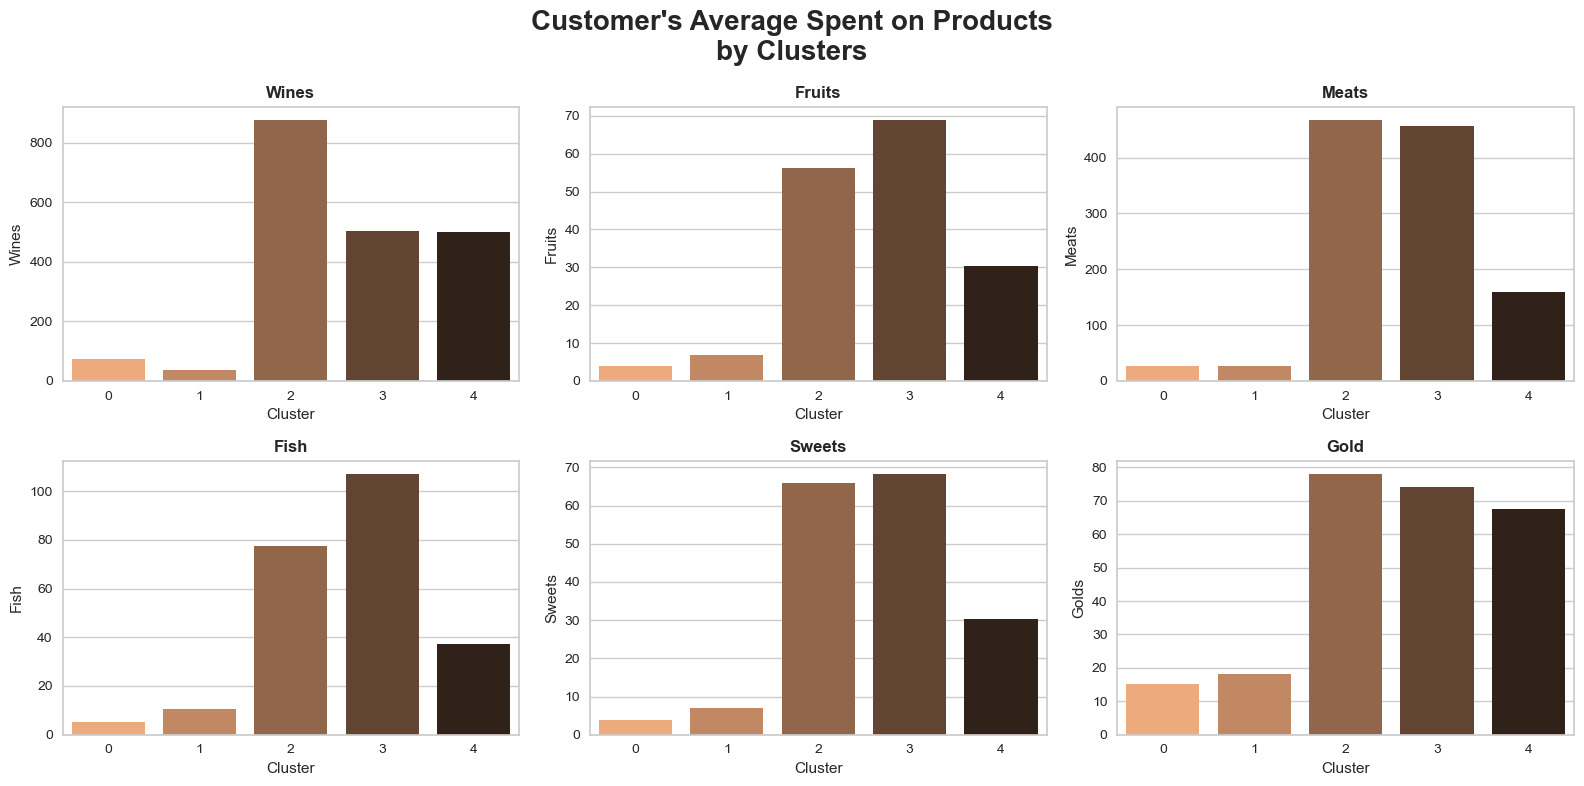

In [44]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
fig.suptitle("Customer's Average Spent on Products\nby Clusters", weight='bold', fontsize=20)
axes = axes.flatten()

sns.barplot(data=df, x='Cluster', y='Wines', palette='copper_r', ci=None, ax=axes[0])
axes[0].set_title('Wines', weight='bold')
sns.barplot(data=df, x='Cluster', y='Fruits', palette='copper_r', ci=None, ax=axes[1])
axes[1].set_title('Fruits', weight='bold')
sns.barplot(data=df, x='Cluster', y='Meats', palette='copper_r', ci=None, ax=axes[2])
axes[2].set_title('Meats', weight='bold')
sns.barplot(data=df, x='Cluster', y='Fish', palette='copper_r', ci=None, ax=axes[3])
axes[3].set_title('Fish', weight='bold')
sns.barplot(data=df, x='Cluster', y='Sweets', palette='copper_r', ci=None, ax=axes[4])
axes[4].set_title('Sweets', weight='bold')
sns.barplot(data=df, x='Cluster', y='Golds', palette='copper_r', ci=None, ax=axes[5])
axes[5].set_title('Gold', weight='bold')

plt.tight_layout()

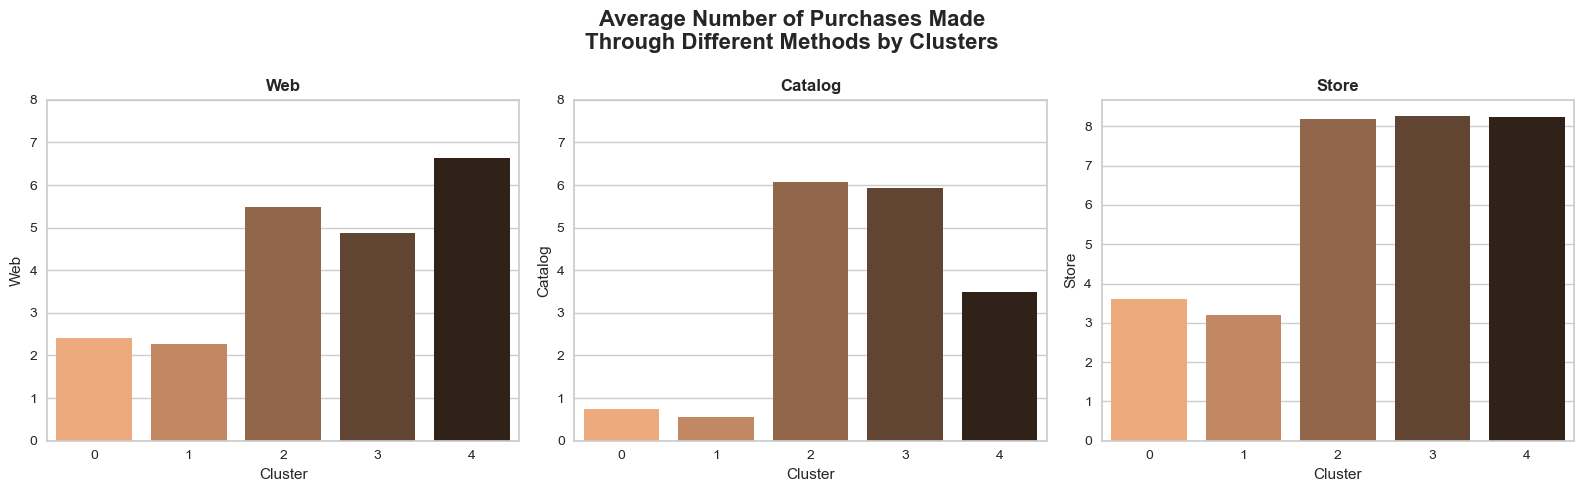

In [45]:
fig, axes = plt.subplots(1,3, figsize=(16,5))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Clusters", weight='bold', fontsize=16)
axes = axes.flatten()

custom_ylim = (0, 8)
plt.setp(axes[0], ylim=custom_ylim)
plt.setp(axes[1], ylim=custom_ylim)

# Bar plot
sns.barplot(data=df, x='Cluster', y='Web', palette='copper_r', ci=None, ax=axes[0])
axes[0].set_title('Web', weight='bold')
sns.barplot(data=df, x='Cluster', y='Catalog', palette='copper_r', ci=None, ax=axes[1])
axes[1].set_title('Catalog', weight='bold')
sns.barplot(data=df, x='Cluster', y='Store', palette='copper_r', ci=None, ax=axes[2])
axes[2].set_title('Store', weight='bold')

plt.tight_layout()

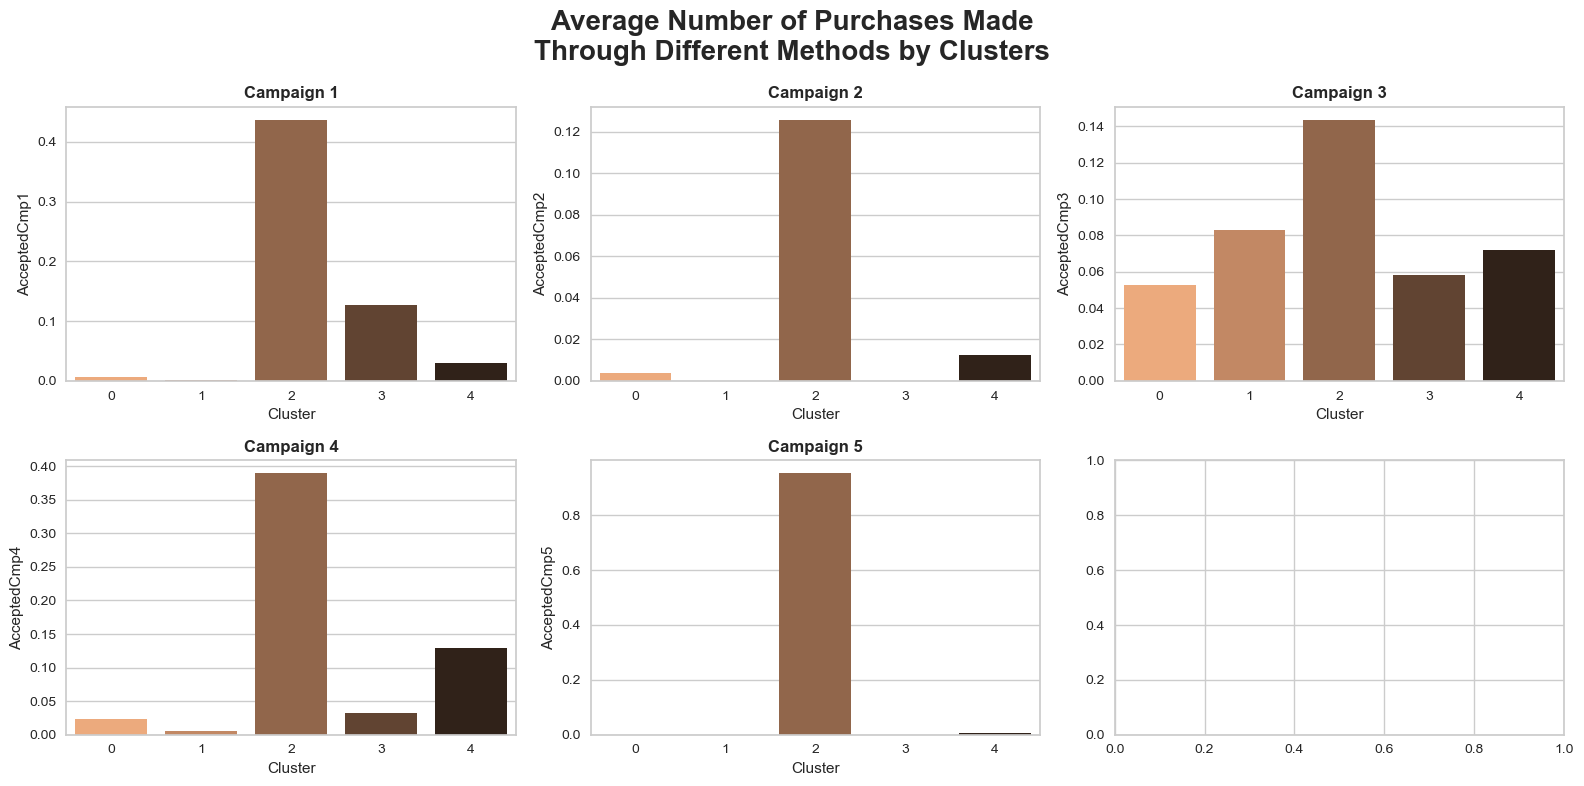

In [47]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Clusters", weight='bold', fontsize=20)
axes = axes.flatten()

sns.barplot(data=df, x='Cluster', y='AcceptedCmp1', palette='copper_r', ci=None, ax=axes[0])
axes[0].set_title('Campaign 1', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp2', palette='copper_r', ci=None, ax=axes[1])
axes[1].set_title('Campaign 2', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp3', palette='copper_r', ci=None, ax=axes[2])
axes[2].set_title('Campaign 3', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp4', palette='copper_r', ci=None, ax=axes[3])
axes[3].set_title('Campaign 4', weight='bold')
sns.barplot(data=df, x='Cluster', y='AcceptedCmp5', palette='copper_r', ci=None, ax=axes[4])
axes[4].set_title('Campaign 5', weight='bold')


plt.tight_layout()

<AxesSubplot:title={'center':'Average Number of Purchases Made with a Discount\nby Clusters'}, xlabel='Cluster', ylabel='NumDealsPurchases'>

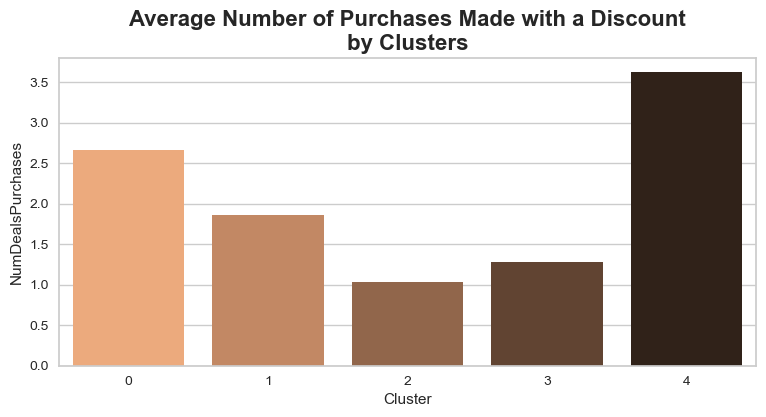

In [48]:
plt.figure(figsize=(9,4))
plt.title('Average Number of Purchases Made with a Discount\nby Clusters', weight='bold', fontsize=16)
sns.barplot(data=df, x='Cluster', y='NumDealsPurchases', ci=None, palette='copper_r')

**Here's the conclusion of each cluster:**

**Cluster 0:**
Span all ages
Majority of them are a parent
Have a max 3 children


**Cluster 1:**
Relatively younger
Have a max 2 children, dominated by kids
Undergraduate students or those who don't pursue a bachelor degree
       

**Cluster 2:**
Span all ages
A large number of them are not a parent
Actively participated in all 5 campaigns


**Cluster 3:**
Relatively older
Almost all of them are a parent, except a very few number of people
Have a max 3 children, dominated by teenagers
High participation in discount products

**Cluster 4:**
Span all ages
Most of them are not a parent
For those who are a parent, they have 1 teenager at home
